In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_train=pd.read_csv("/content/trainset.csv")

In [3]:
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
training_set=data_train.iloc[:,1:2].values

In [6]:
training_set.shape

(1259, 1)

In [7]:
sc=MinMaxScaler(feature_range=(0,1))

In [8]:
train_scaled=sc.fit_transform(training_set)

In [9]:
x_train=[]
y_train=[]
for i in range(60,len(train_scaled)):
  x_train.append(train_scaled[i-60:i,0])
  y_train.append(train_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [10]:
x_train.shape

(1199, 60)

In [11]:
y_train.shape

(1199,)

In [12]:
x_train=np.reshape(x_train,newshape=
                   (x_train.shape[0],x_train.shape[1],1))

In [13]:
x_train.shape

(1199, 60, 1)

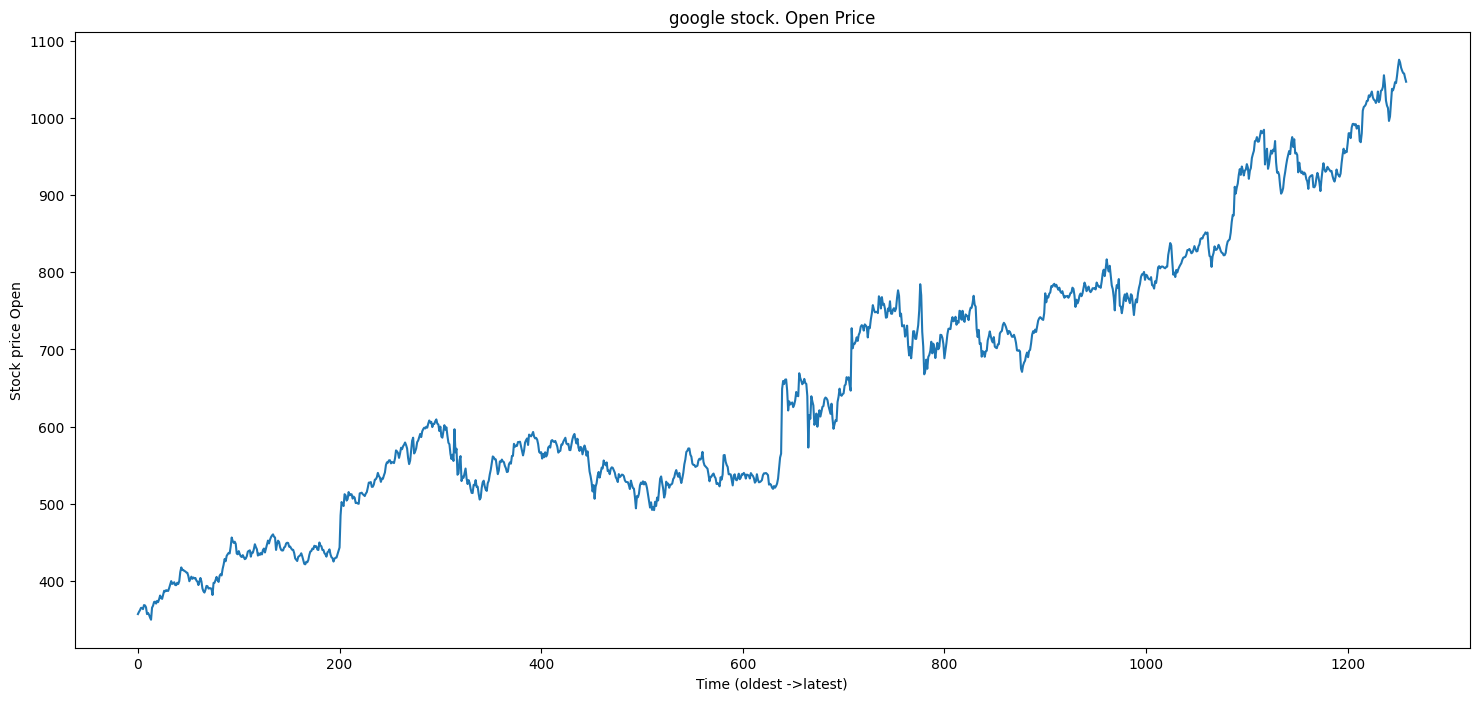

In [14]:
plt.figure(figsize=(18,8))
plt.plot(data_train['Open'])
plt.title("google stock. Open Price")
plt.xlabel("Time (oldest ->latest)")
plt.ylabel("Stock price Open")
plt.show()

In [16]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(rate=0.2))

regressor.add(Dense(units=1))


In [17]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50)               

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
regressor.fit(x=x_train,y=y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 27s 234ms/step - loss: 0.0307
Epoch 2/100
38/38 [==============================] - 8s 200ms/step - loss: 0.0043
Epoch 3/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0040
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0036
Epoch 5/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0038
Epoch 6/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0032
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0031
Epoch 8/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0038
Epoch 9/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0034
Epoch 10/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0029
Epoch 12/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0030
Epoch 13/100

In [21]:
 data_test=pd.read_csv('/content/testset.csv')

In [22]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [23]:
real_price=data_test.iloc[:,1:2].values

In [24]:
real_price.shape

(125, 1)

In [26]:
data_total=pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-60:].values

In [27]:
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [28]:
len(inputs)

185

In [31]:
x_test=[]
for i in range(60,len(inputs)):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [32]:
x_test.shape

(125, 60, 1)

In [34]:
predicted_price=regressor.predict(x_test)

4/4 [==============================] - 4s 64ms/step


In [35]:
predicted_price=sc.inverse_transform(predicted_price)

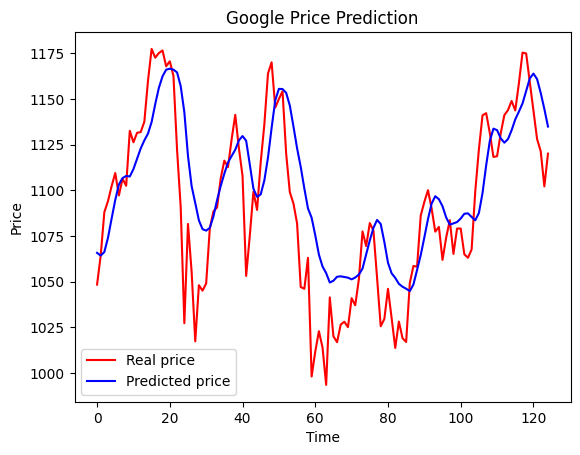

In [36]:
plt.plot(real_price,color='red',label='Real price')
plt.plot(predicted_price,color='blue',label='Predicted price')

plt.title('Google Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

